In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

In [41]:
if img is None:
    raise FileNotFoundError('Image not added. Check path / filename')

In [42]:
hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))


In [43]:
pdf = hist/hist.sum()


In [44]:
cdf = pdf.cumsum()

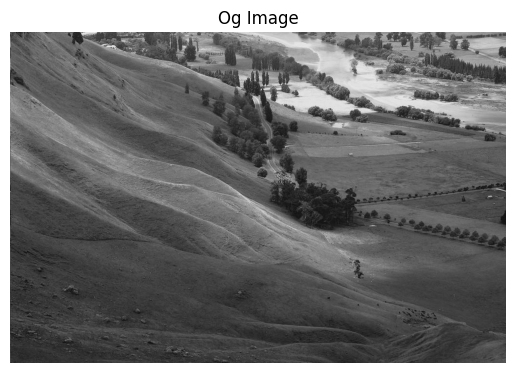

In [52]:
plt.imshow(img, cmap='gray')
plt.title("Og Image")
plt.axis("Off")

plt.show()

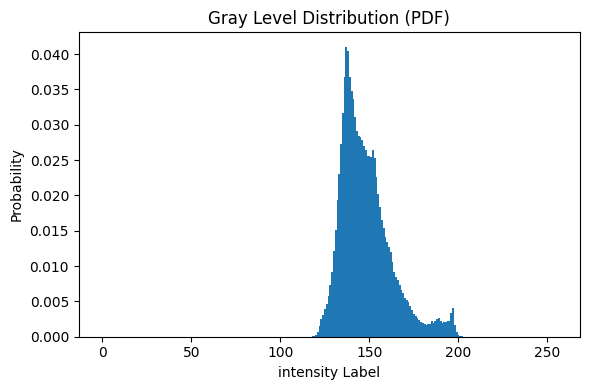

In [45]:
plt.figure(figsize=(6, 4))
plt.bar(range(256), pdf, width=1)
plt.title("Gray Level Distribution (PDF)")
plt.xlabel("intensity Label")
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

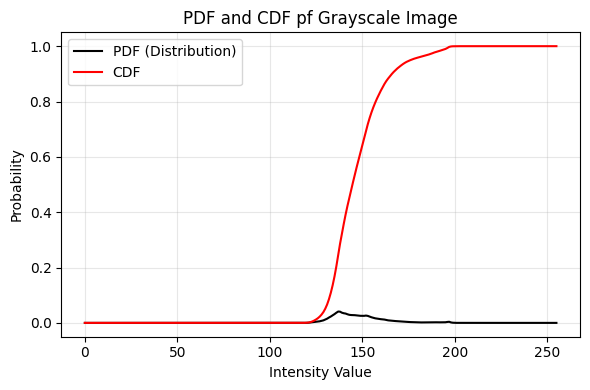

In [ ]:
plt.figure()

plt.plot(pdf, label="PDF (Distribution)", color = "black")

plt.plot(cdf, label="CDF", color="red")

plt.title("PDF and CDF pf Grayscale Image")
plt.xlabel('Intensity Value')
plt.ylabel("Probability")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
cdf_min = cdf[cdf > 0][0]
cdf_he = (cdf - cdf_min) / (1 - cdf_min)
lut = np.round(cdf_he * 255).astype(np.uint8)
he_img = lut[img]

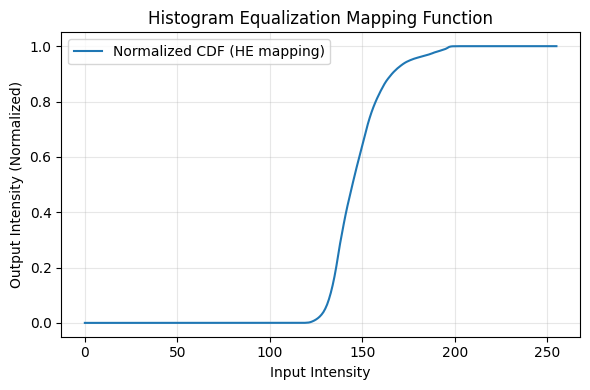

In [48]:
plt.figure(figsize=(6,4))
plt.plot(cdf_he, label="Normalized CDF (HE mapping)")
plt.title("Histogram Equalization Mapping Function")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity (Normalized)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
hist_he, _ = np.histogram(he_img.flatten(), 256, [0, 256])
pdf_he = hist_he / hist_he.sum()

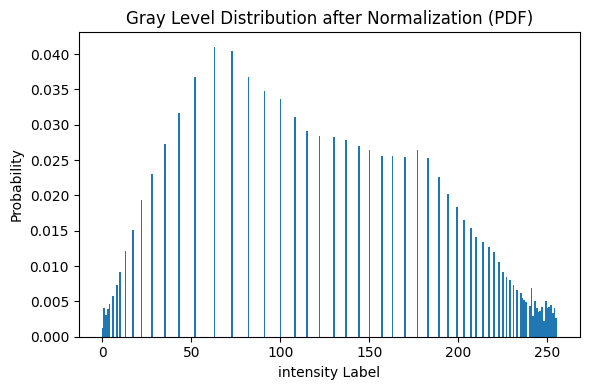

In [50]:
plt.figure(figsize=(6, 4))
plt.bar(range(256), pdf_he, width=1)
plt.title("Gray Level Distribution after Normalization (PDF)")
plt.xlabel("intensity Label")
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

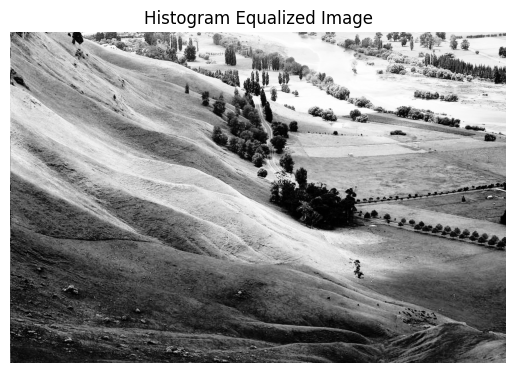

In [51]:
plt.imshow(he_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("Off")

plt.show()